<a href="https://colab.research.google.com/github/ggalarza1/Julia_graphing/blob/main/Julia_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2025-02-23 07:37:34 URL:https://julialang-s3.julialang.org/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.8

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


After installing language, go to Edit settings. Click on Notebook settings and change the language to Julia 1.8.2

In [1]:
] add Graphs

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Inflate ──────────── v0.1.5
   Installed OrderedCollections ─ v1.8.0
   Installed ArnoldiMethod ────── v0.4.0
   Installed StaticArraysCore ─── v1.4.3
   Installed MacroTools ───────── v0.5.15
   Installed DataStructures ───── v0.18.20
   Installed StaticArrays ─────── v1.9.12
   Installed Graphs ───────────── v1.12.0
   Installed SimpleTraits ─────── v0.9.4
    Updating `~/.julia/environments/v1.8/Project.toml`
  [86223c79] + Graphs v1.12.0
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [ec485272] + ArnoldiMethod v0.4.0
  [864edb3b] + DataStructures v0.18.20
  [86223c79] + Graphs v1.12.0
  [d25df0c9] + Inflate v0.1.5
  [1914dd2f] + MacroTools v0.5.15
  [bac558e1] + OrderedCollections v1.8.0
  [699a6c99] + SimpleTraits v0.9.4
  [90137ffa] + StaticArrays v1.9.12
  [1e83bf80] + StaticArraysCore v1.4.3
  [8ba89e20] + Distributed
  [1a1011a3] + SharedArrays
Precompiling proj

In [2]:
] add GraphPlot

   Resolving package versions...
   Installed Reexport ────────── v1.2.2
   Installed FixedPointNumbers ─ v0.8.5
   Installed Requires ────────── v1.3.0
   Installed IterTools ───────── v1.10.0
   Installed ColorTypes ──────── v0.11.5
   Installed Colors ──────────── v0.12.11
   Installed GraphPlot ───────── v0.6.1
   Installed Measures ────────── v0.3.2
   Installed Compose ─────────── v0.9.5
    Updating `~/.julia/environments/v1.8/Project.toml`
  [a2cc645c] + GraphPlot v0.6.1
    Updating `~/.julia/environments/v1.8/Manifest.toml`
⌅ [3da002f7] + ColorTypes v0.11.5
⌅ [5ae59095] + Colors v0.12.11
  [a81c6b42] + Compose v0.9.5
  [53c48c17] + FixedPointNumbers v0.8.5
  [a2cc645c] + GraphPlot v0.6.1
  [c8e1da08] + IterTools v1.10.0
  [442fdcdd] + Measures v0.3.2
  [189a3867] + Reexport v1.2.2
  [ae029012] + Requires v1.3.0
  [8bb1440f] + DelimitedFiles
        Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why us

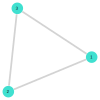

In [3]:
using Graphs
using GraphPlot

G₁ = Graph(3) # graph with 3 vertices

# make a triangle
add_edge!(G₁, 1, 2)
add_edge!(G₁, 1, 3)
add_edge!(G₁, 2, 3)

gplot(G₁, nodelabel=1:3)

In [4]:
using BenchmarkTools

M = rand(2^11, 2^11)

@btime M * M

@btime M * M

  419.561 ms (2 allocations: 32.00 MiB)
  412.041 ms (2 allocations: 32.00 MiB)


2048×2048 Matrix{Float64}:
 525.33   509.012  513.065  524.546  523.138  …  507.631  524.863  525.098  512.75   505.637
 517.638  504.925  506.363  513.642  513.641     507.75   526.517  522.092  505.499  503.221
 525.774  521.174  519.465  529.374  519.399     514.873  528.162  535.277  513.321  501.861
 528.411  513.188  514.078  527.122  520.104     513.321  523.761  529.43   512.578  507.68
 511.908  507.348  498.358  514.495  513.157     496.086  511.586  518.308  498.58   490.412
 523.232  513.485  515.148  512.834  518.862  …  502.815  516.766  524.286  507.736  500.01
 526.596  514.315  524.02   524.409  524.289     516.261  518.623  533.258  517.775  504.951
 530.138  510.572  513.812  517.419  518.292     505.853  517.964  527.475  509.121  498.04
 513.713  505.31   505.657  517.214  516.477     500.376  512.463  522.602  502.471  502.582
 520.159  517.812  514.933  530.003  521.62      510.498  526.357  527.992  507.117  503.191
 516.73   508.915  517.683  514.503  516.487  

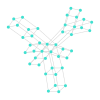

In [5]:
# metal plate
□ = Graph(4)
add_edge!(□, 1, 2)
add_edge!(□, 1, 3)
add_edge!(□, 2, 4)
add_edge!(□, 3, 4)

# airplane skeleton
skeleton = Graph(11)
add_edge!(skeleton, 1, 2)
add_edge!(skeleton, 2, 3)
add_edge!(skeleton, 3, 4)
add_edge!(skeleton, 4, 5)
add_edge!(skeleton, 3, 6)
add_edge!(skeleton, 3, 7)
add_edge!(skeleton, 3, 8)
add_edge!(skeleton, 3, 9)
add_edge!(skeleton, 9, 10)
add_edge!(skeleton, 9, 11)

gplot(cartesian_product(□, skeleton))

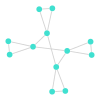

In [6]:
G = CliqueGraph(3,4)

gplot(G)

In [10]:
] add Plots

   Resolving package versions...
   Installed JpegTurbo_jll ──────────────── v3.1.1+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed LoggingExtras ──────────────── v1.1.0
   Installed libdecor_jll ───────────────── v0.2.2+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.6+1
   Installed RelocatableFolders ─────────── v1.0.1
   Installed Opus_jll ───────────────────── v1.3.3+0
   Installed libfdk_aac_jll ─────────────── v2.0.3+0
   Installed GR_jll ─────────────────────── v0.73.6+0
   Installed Libmount_jll ───────────────── v2.40.3+0
   Installed Contour ────────────────────── v0.6.3
   Installed Unitful ────────────────────── v1.22.0
   Installed ConcurrentUtilities ────────── v2.5.0
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed RecipesPipeline ────────────── v0.6.12
   Installed Grisu ──────────────────────── v1.0.2
   Installed Xorg_libpt

[ Info: Saved animation to /content/tmp.gif


Plots.AnimatedGif("/content/tmp.gif")
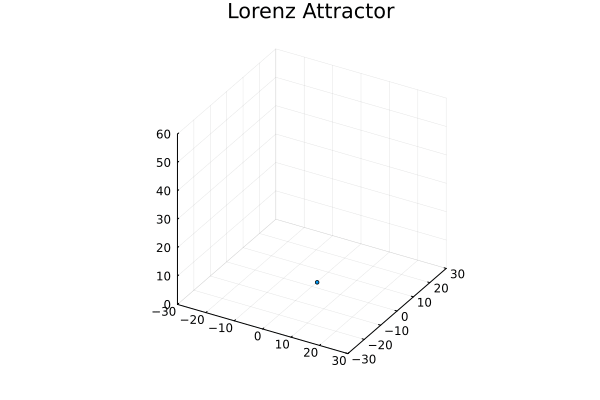

In [11]:
using Plots
# define the Lorenz attractor
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x)
    dy = l.x * (l.ρ - l.z) - l.y
    dz = l.x * l.y - l.β * l.z
    l.x += l.dt * dx
    l.y += l.dt * dy
    l.z += l.dt * dz
end

attractor = Lorenz()


# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    legend = false,
    marker = 2,
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10

[ Info: Saved animation to /content/tmp.gif


Plots.AnimatedGif("/content/tmp.gif")
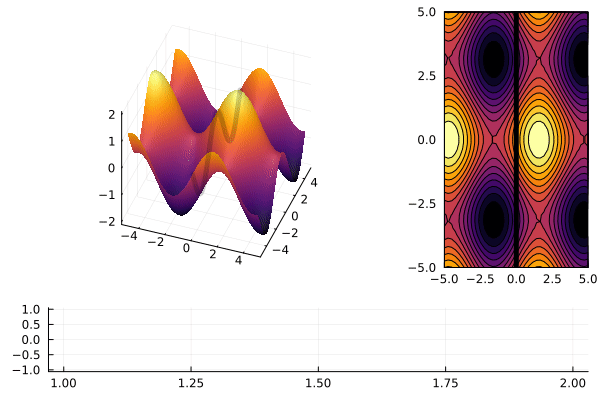

In [16]:
using Plots
default(legend = false)
x = y = range(-5, 5, length = 40)
zs = zeros(0, 40)
n = 100

@gif for i in range(0, stop = 2π, length = n)
    f(x, y) = sin(x + 10sin(i)) + cos(y)

    # create a plot with 3 subplots and a custom layout
    l = @layout [a{0.7w} b; c{0.2h}]
    p = plot(x, y, f, st = [:surface, :contourf], layout = l)

    # induce a slight oscillating camera angle sweep, in degrees (azimuth, altitude)
    plot!(p[1], camera = (10 * (1 + cos(i)), 40))

    # add a tracking line
    fixed_x = zeros(40)
    z = map(f, fixed_x, y)
    plot!(p[1], fixed_x, y, z, line = (:black, 5, 0.2))
    vline!(p[2], [0], line = (:black, 5))

    # add to and show the tracked values over time
    global zs = vcat(zs, z')
    plot!(p[3], zs, alpha = 0.2, palette = cgrad(:reds).colors)
end


In [14]:
] add RDatasets

   Resolving package versions...
   Installed WorkerUtilities ───────────── v1.6.1
   Installed WeakRefStrings ────────────── v1.4.2
   Installed InlineStrings ─────────────── v1.4.3
   Installed SentinelArrays ────────────── v1.4.8
   Installed ExprTools ─────────────────── v0.1.10
   Installed FileIO ────────────────────── v1.16.6
   Installed DataFrames ────────────────── v1.7.0
   Installed TableTraits ───────────────── v1.0.1
   Installed InvertedIndices ───────────── v1.3.1
   Installed DataValueInterfaces ───────── v1.0.0
   Installed Crayons ───────────────────── v4.1.1
   Installed CategoricalArrays ─────────── v0.10.8
   Installed PooledArrays ──────────────── v1.4.3
   Installed TimeZones ─────────────────── v1.21.2
   Installed PrettyTables ──────────────── v2.3.2
   Installed IteratorInterfaceExtensions ─ v1.0.0
   Installed TZJData ───────────────────── v1.4.0+2025a
   Installed Tables ────────────────────── v1.12.0
   Installed FilePathsBase ─────────────── v0.9.23
   In

┌ Warning: Skipped marker arg [:cross :hearts :star7].
└ @ Plots ~/.julia/packages/Plots/Ec1L1/src/args.jl:1149


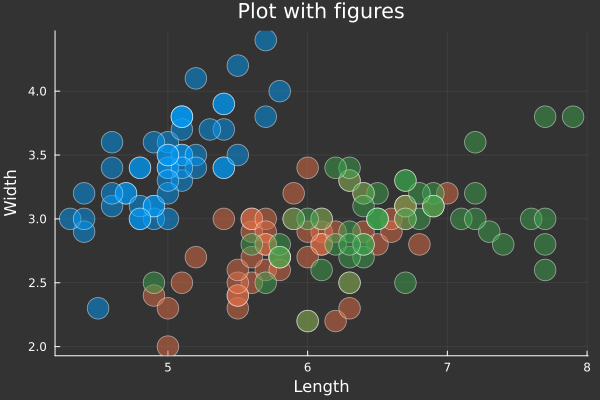

In [21]:
# load a dataset
using RDatasets
iris = dataset("datasets", "iris");

# load the StatsPlots recipes (for DataFrames) available via:
# Pkg.add("StatsPlots")
using StatsPlots

# Scatter plot with some custom settings
@df iris scatter(
    :SepalLength,
    :SepalWidth,
    group = :Species,
    title = "Plot with figures",
    xlabel = "Length",
    ylabel = "Width",
    m = (0.5, [:cross :hearts :star7], 12),
    bg = RGB(0.2, 0.2, 0.2)
)

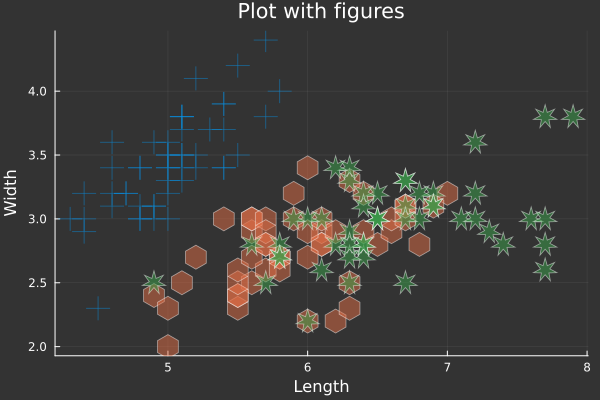

In [27]:
# load a dataset
using RDatasets
iris = dataset("datasets", "iris");

# load the StatsPlots recipes (for DataFrames) available via:
# Pkg.add("StatsPlots")
using StatsPlots

# Scatter plot with some custom settings
@df iris scatter(
    :SepalLength,
    :SepalWidth,
    group = :Species,
    title = "Plot with figures",
    xlabel = "Length",
    ylabel = "Width",
    m = (0.5, [:cross :hex :star7], 12),
    bg = RGB(0.2, 0.2, 0.2)
)

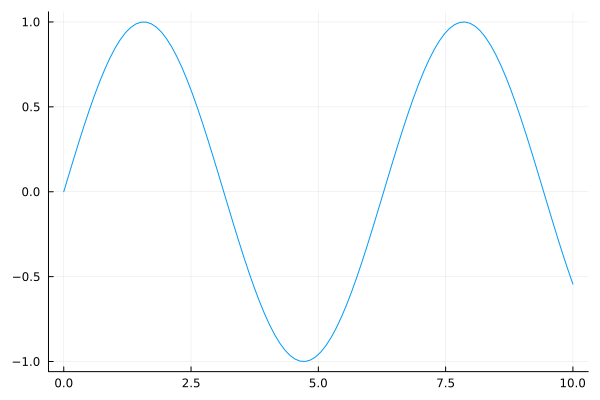

In [22]:
x = range(0, 10, length=100)
y = sin.(x)
plot(x, y)


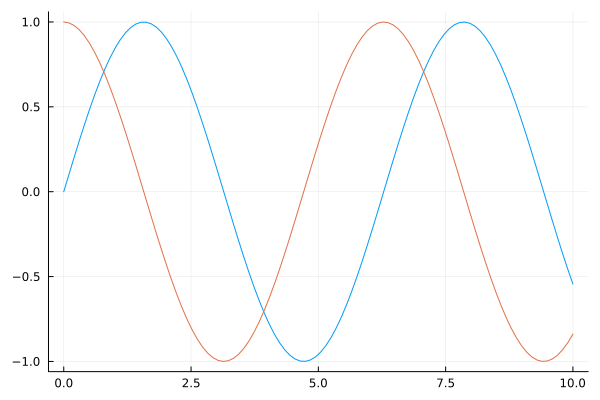

In [23]:
x = range(0, 10, length=100)
y1 = sin.(x)
y2 = cos.(x)
plot(x, [y1 y2])

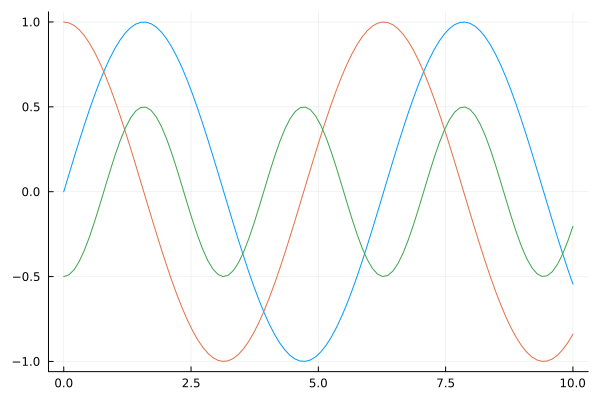

In [24]:
y3 = @. sin(x)^2 - 1/2   # equivalent to y3 = sin.(x).^2 .- 1/2
plot!(x, y3)

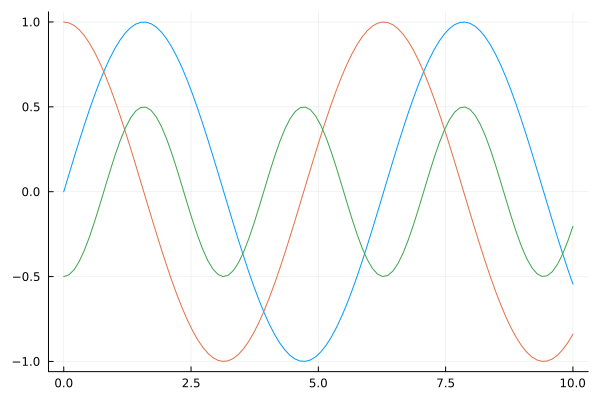

In [25]:
x = range(0, 10, length=100)
y1 = sin.(x)
y2 = cos.(x)
p = plot(x, [y1 y2])

y3 = @. sin(x)^2 - 1/2
plot!(p, x, y3)